<a href="https://colab.research.google.com/github/sympony/Fruit-Image-for-Object-Dectection/blob/main/Fruit_Image_for_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd

import os

import cv2
from PIL import Image

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, MaxPool2D
from keras.layers import Activation, Convolution2D, AveragePooling2D, BatchNormalization, GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.optimizers import rmsprop_v2, adam_v2
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [4]:
images = []
labels = []

train_path = '/content/drive/MyDrive/Data/Fruit image for object detection/train'
for filename in os.listdir(train_path):
  if filename.split('.')[1] == 'jpg':
    img = cv2.imread(os.path.join(train_path, filename))
    ary = Image.fromarray(img, 'RGB')
    r = ary.resize((50, 50))
    labels.append(filename.split('_')[0])
    images.append(np.array(r))

In [5]:
np.unique(labels)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [8]:
la = LabelEncoder()
labels = pd.DataFrame(labels)
labels = la.fit_transform(labels[0])
labels

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3])

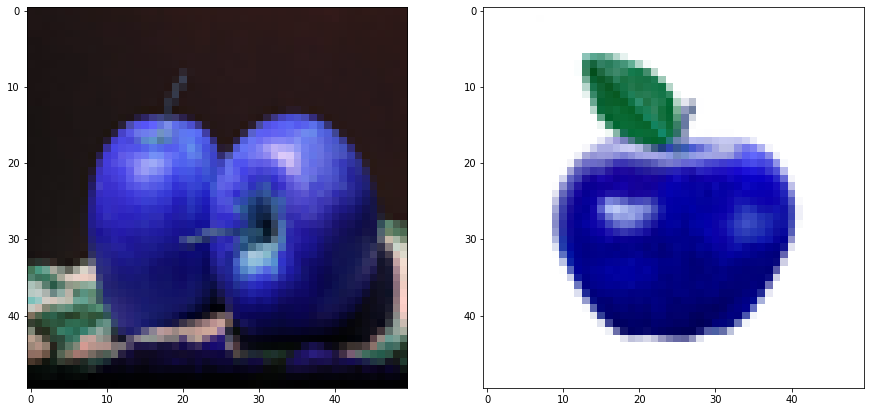

In [10]:
figure = plt.figure(figsize=(15, 10))
ax = figure.add_subplot(121)
ax.imshow(images[0])
bx = figure.add_subplot(122)
bx.imshow(images[60])
plt.show()

In [11]:
images = np.array(images)
np.save('image', images)
np.save('labels', labels)

In [12]:
image = np.load('image.npy', allow_pickle=True)
labels = np.load('labels.npy', allow_pickle=True)

In [13]:
s = np.arange(image.shape[0])
np.random.shuffle(s)
image = image[s]
labels = labels[s]

In [31]:
labels

array([3, 3, 1, 1, 3, 0, 3, 3, 0, 0, 2, 1, 0, 1, 0, 3, 1, 3, 0, 0, 1, 3,
       1, 3, 1, 0, 3, 0, 3, 3, 3, 3, 0, 1, 3, 3, 1, 1, 1, 1, 1, 3, 0, 2,
       1, 3, 0, 3, 3, 3, 3, 0, 1, 0, 1, 1, 0, 1, 3, 3, 1, 0, 2, 0, 1, 3,
       0, 2, 3, 3, 1, 3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 3, 3, 1, 0, 0, 1, 1,
       3, 3, 0, 0, 0, 0, 2, 0, 3, 1, 0, 2, 0, 0, 1, 3, 3, 3, 3, 2, 0, 0,
       1, 0, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 3, 3, 2, 2, 1, 1,
       1, 1, 1, 1, 0, 0, 3, 0, 3, 0, 0, 1, 3, 2, 3, 0, 3, 1, 1, 3, 3, 1,
       0, 2, 1, 0, 0, 3, 0, 1, 1, 1, 3, 3, 1, 2, 3, 0, 3, 3, 0, 3, 1, 1,
       1, 3, 0, 3, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 3, 1, 3, 0, 0, 0, 1, 3,
       1, 1, 0, 1, 3, 1, 1, 0, 0, 1, 1, 0, 3, 1, 1, 2, 1, 0, 3, 0, 3, 0,
       0, 1, 0, 2, 0, 3, 2, 3, 3, 3, 1, 3, 0, 3, 0, 0, 1, 0, 0, 0])

In [14]:
num_classes = len(np.unique(labels))
len_data = len(image)

In [15]:
X_train, X_test = image[(int)(0.1 * len_data) : ], image[: (int)(0.1 * len_data)]

In [16]:
y_train, y_test = labels[(int)(0.1 * len_data) : ], labels[: (int)(0.1 * len_data)]

In [35]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

In [20]:
from keras.optimizer_v2.adam import Adam
l2_reg = 0.001
opt = Adam(learning_rate=0.001)

In [36]:
from warnings import filters
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2, 2), input_shape=(50, 50, 3), activation='relu', kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='relu', kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(2, 2), activation='relu', kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 49, 49, 32)        416       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 23, 23, 64)        8256      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 128)       32896     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 128)       

In [37]:
filepath = 'weights.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split=0.33, callbacks=[checkpoint])

Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 14.1782 - accuracy: 0.1389
Epoch 1: loss improved from inf to 14.17820, saving model to weights.hdf5
2/2 [==============================] - 3s 834ms/step - loss: 14.1782 - accuracy: 0.1389 - val_loss: 6.8051 - val_accuracy: 0.2917
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 6.8615 - accuracy: 0.3194
Epoch 2: loss improved from 14.17820 to 6.86153, saving model to weights.hdf5
2/2 [==============================] - 1s 267ms/step - loss: 6.8615 - accuracy: 0.3194 - val_loss: 9.0366 - val_accuracy: 0.2778
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 8.4380 - accuracy: 0.2917
Epoch 3: loss did not improve from 6.86153
2/2 [==============================] - 1s 165ms/step - loss: 8.4380 - accuracy: 0.2917 - val_loss: 5.2850 - val_accuracy: 0.2778
Epoch 4/100
2/2 [==============================] - ETA: 0s - loss: 5.1361 - accuracy: 0.2986
Epoch 4: loss improved from 6.86153 to 5.136

In [38]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss : ', scores[0])
print('Test accuarcy : ', scores[1])

1/1 [==============================] - 0s 55ms/step - loss: 0.7531 - accuracy: 0.8750
Test loss :  0.7531259059906006
Test accuarcy :  0.875


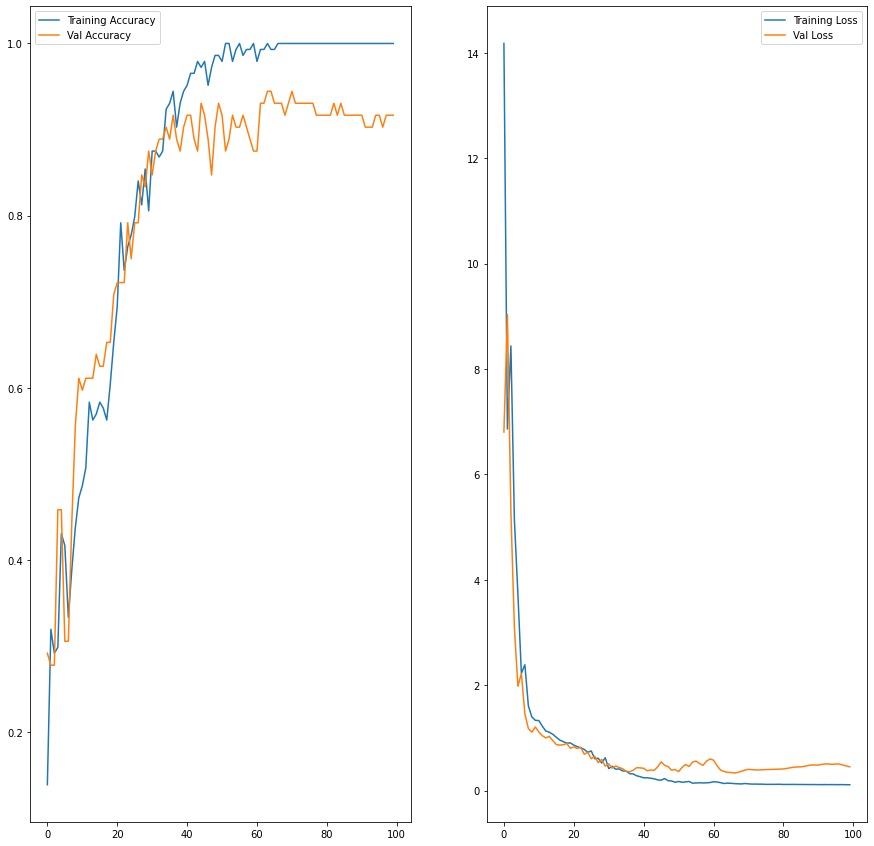

In [39]:
figure=plt.figure(figsize=(15,15))
ax=figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx=figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

# Test

In [40]:
test_path = '/content/drive/MyDrive/Data/Fruit image for object detection/test'
t_labels=[]
t_images=[]
for filename in os.listdir('/content/drive/MyDrive/Data/Fruit image for object detection/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        ary=Image.fromarray(img,'RGB')
        r=ary.resize((50,50))
        t_labels.append(filename.split('_')[0])
        t_images.append(np.array(r))

In [41]:
t_images=np.array(t_images)
np.save("t_image", t_images)
t_image=np.load("image.npy", allow_pickle=True)

In [42]:
pred=np.argmax(model.predict(t_image), axis=1)
prediction = la.inverse_transform(pred)

In [43]:
t_image=np.expand_dims(t_images[10], axis=0)
pred_t=np.argmax(model.predict(t_image), axis=1)
prediction_t = la.inverse_transform(pred_t)

mixed


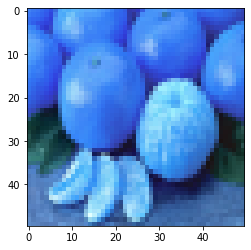

In [51]:
print(prediction_t[0])
plt.imshow(t_images[10])